**Лабораторная работа 1 по курсу ОВВ**
Lab1_HPC

Выполнил_Sergey.R 6135

Среда выполнения "google colaboratory"

В данной работе реализовано перемножение матриц как на GPU и CPU
CPU: Intel(R) Xeon(R) CPU @ 2.20GHz
GPU:  Nvidia Tesla K80
В качестве основной вычислительной библиотеки использована cupy

In [17]:
# Библиотеки
import numpy as np
import cupy as cp
import time
# Библиотека для визуализации
import matplotlib.pyplot as plt
# Библиотека для работы с эксель
from openpyxl import Workbook
from datetime import datetime

In [18]:
# Параметры запуска
MatSizeStart = 100
MatSizeEnd = 2001
MatStepSize = 100
path_file = 'results_tab'

In [19]:
class CoreDot():
    # главный класс
    def __init__(self,size,results_tab,path_file):
        self.size = size
        self.results_tab = results_tab
        self.path_file = path_file
		
    def perfom_experiment(self):
        #Основные вычисления, перебор матриц заданных размеров, формирование результатов
        for index in range(len(self.size)):
            self.results_tab[0, index]=self.size[index]
			
		       	# Создание матрицы через numpy
	          # 'f' определяет способ располож матрицы в памяти column-major 
            matrix_a = np.ones((self.size[index], self.size[index]), 'f') 
            matrix_b = np.ones((self.size[index], self.size[index]), 'f')
			
		      	# перемножение матриц cpu
            tstartCPU = time.time()
            dot_product_cpu = np.dot(matrix_a, matrix_b)
            tendCPU = time.time()
            self.results_tab[1, index] = tendCPU - tstartCPU
         
		      	# Создание матрицы через cupy
            matrix_a = cp.ones((self.size[index],self.size[index]), 'f') 
            matrix_b = cp.ones((self.size[index], self.size[index]), 'f')		
			
		      	# перемножение матриц gpu
            tstartGPU = time.time()
            dot_product_gpu = cp.dot(matrix_a, matrix_b)
            tendGPU = time.time()
            self.results_tab[2, index] = tendGPU - tstartGPU
           
            # Ускорение относительно CPU
            self.results_tab[3, index] = (self.results_tab[1, index] / self.results_tab[2, index])
            
		      	# проверку точности выполняем спомощью вычисления разницы между "эталонной" и "результирующей" матрицей.
            # Проверка точности CPU
            check_matrixCPU = np.ones((self.size[index], self.size[index]), 'f') * self.size[index]
            deviation_matrix = dot_product_cpu - check_matrixCPU			
            self.results_tab[4, index] = np.absolute(deviation_matrix).argmax() 
            # Проверка точности GPU
            check_matrixGPU = cp.ones((self.size[index], self.size[index]), 'f') * self.size[index]
            deviation_matrix = dot_product_gpu - check_matrixGPU
            self.results_tab[5, index] = np.absolute(deviation_matrix).argmax()


    def save_computations(self):
        # Создать рабочую книгу в Excel:
        dt = datetime.now()
        wb = Workbook()
        sheet = wb.active
        sheet.title = self.path_file

        # Добавить заголовки в рабочую книгу Excel:
         
        sheet['A' + str(1)] = 'Размер матрицы'
        sheet['B' + str(1)] = 'Время вычисления CPU, с'
        sheet['C' + str(1)] = 'Время вычисления GPU, с'     
        sheet['D' + str(1)] = 'Ускорение GPU относительно CPU'
        sheet['E' + str(1)] = 'Точность CPU'
        sheet['F' + str(1)] = 'Точность GPU'
	   # Заносим данные в таблицу
        t=0
        for item in self.results_tab:
            for j in range(len(item)):
                if (t==0): sheet['A' + str(j+2)] = item[j]
                elif (t==1): sheet['B' + str(j + 2)] = item[j]
                elif (t==2): sheet['C' + str(j + 2)] = item[j] 
                elif (t==3): sheet['D' + str(j + 2)] = item[j]
                elif (t==4): sheet['E' + str(j + 2)] = item[j]   				
                else: sheet['F' + str(j + 2)] = item[j]
            t=t+1
			
        # Сохраняем таблицу:
        filename = self.path_file + '.xlsx'
        wb.save(filename)


    def plot_results(self):
        #  Визуализация
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        ax.set_title(u'Результаты эксперимента:')
        
        plt.xlabel("Размер матриц", fontsize=14, fontstyle="normal")
        plt.ylabel("Время расчета, с", fontsize=14, fontstyle="normal")
        ax.plot(self.results_tab[0, :], self.results_tab[1, :], 'ko-', color='grey', label=r'$CPU$')
        ax.plot(self.results_tab[0, :], self.results_tab[2, :], 'gs-', color='green', label=r'$GPU$') 
        ax.legend(loc='best')
        fig.savefig('Result visual.jpeg')
        fig.show()

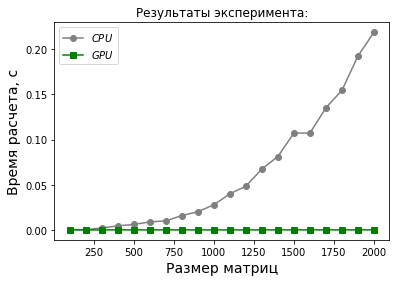

In [20]:
# Объявляем буфер для хранения размеров матриц 
size = []

# создание множества матриц для эксперимента
[size.append(idx) for idx in range(MatSizeStart,MatSizeEnd,MatStepSize)]
results_tab = np.zeros((6,len(size)))

experim_dot = CoreDot(size,results_tab,path_file) # запуск эксперимента
experim_dot.perfom_experiment()
experim_dot.plot_results()
experim_dot.save_computations()
